In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [Errno 11001] getaddrinfo failed

In [6]:
print(f"X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"X_train = {X_test.shape}, y_train = {y_test.shape}")

X_train = (60000, 28, 28), y_train = (60000,)
X_train = (10000, 28, 28), y_train = (10000,)


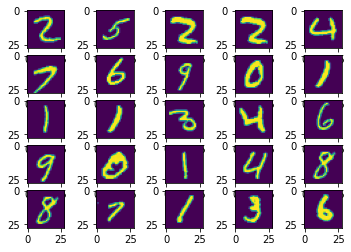

In [15]:
for i in range(0, 25):
  num = np.random.randint(100)
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[num])

plt.show()

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation=tf.nn.relu, kernel_initializer=tf.initializers.he_uniform))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), activation=tf.nn.relu, kernel_initializer=tf.initializers.he_uniform))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dense(124, activation=tf.nn.tanh))
model.add(Dense(56, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

In [25]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metrix = tf.keras.metrics.SparseCategoricalAccuracy()
optimizer = tf.keras.optimizers.Adam()

model.compile(loss=loss, metrics=metrix, optimizer=optimizer)

In [26]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10


ValueError: ignored